# ANALYSIS 1 

# TOP 5 Cuisines with the TOTAL NUMBER of RESTAURANTS offering them in every COUNTRY 

### ALL REQUIRED IMPORTS

In [10]:
import string
import csv, sys
from pandas import Series, DataFrame
import pandas as pd
import os
import glob
import json
import nltk
from pylab import *
from pprint import pprint

### Getting the current system path and defining the required path

In [52]:
directory = os.path.dirname(os.getcwd()) 
path =  directory + '/data/'
path
directory

'/Users/sonalichaudhari/Desktop/final'

### Retrieving all the Cuisines and the count of restaurants respective to each Country

In [16]:
C={}
for subdir, dirs, files in os.walk(path):
    for file in files:
#fnmatch: Test whether the filename string matches the pattern of a json extension, returning True or False
            if file.endswith('.json'): 
                reqpath = subdir+'/'+file
                with open(reqpath) as json_file:
                        d = json.load(json_file)
                        c = d['restaurant']['location']['country_name']
                        cu = d['restaurant']['cuisines'].split(',') #Use of nltk to split the string
                        if c not in C:
                            C[c]={}
                            for x in cu:
                                if x.strip() not in C[c]:
                                    C[c][x.strip()]= 1 #Use of nltk to eliminate blank spaces
                                else:
                                    C[c][x.strip()] += 1
                        else:
                            for x in cu:
                                if x.strip() not in C[c]:
                                    C[c][x.strip()]= 1 #Use of nltk to eliminate blank spaces
                                else:
                                    C[c][x.strip()] += 1

### Loading the above data in the CSV file

In [17]:
cur_path = directory='/final/analysis/ana_1/'
header = ['COUNTRY','CUISINES','RESTAURANT COUNTS']
with open('ANA_1.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(header)
        for k,v in C.items():
            z={}
            z= dict(C[k])
            for x in z:
            #print(x,'-',z[x])
                writer.writerow([k,x,z[x]]) 

### Converting csv data into Dataframe

In [18]:
dataframe = pd.read_csv('/Users/sonalichaudhari/Desktop/final/analysis/ana_1/ANA_1.csv').reset_index(0,drop=True)
dataframe.head(7)

,COUNTRY,CUISINES,RESTAURANT COUNTS
0,Malaysia,Thai,3
1,Malaysia,Western,13
2,Malaysia,Japanese,6
3,Malaysia,Steamboat,1
4,Malaysia,Korean,5
5,Malaysia,American,1
6,Malaysia,Chinese,3


### Getting only the the TOP 5 prominent cuisines for each Country 

In [45]:
p =dataframe.groupby('COUNTRY').apply(lambda x: x.sort_values('RESTAURANT COUNTS', ascending=False))# Sort using lambda function
s = p.groupby('COUNTRY').head(5)[['CUISINES','RESTAURANT COUNTS']]#.reset_index()
#s[['COUNTRY','CUISINES','RESTAURANT COUNTS']]
s.head(10)

CUISINES  RESTAURANT COUNTS
COUNTRY                                            
Australia 207  Modern Australian                694
          240     Coffee and Tea                592
          249               Cafe                447
          276          Breakfast                302
          259           Bar Food                270
Brasil    297          Brazilian                 74
          306           Japanese                 23
          301           Bar Food                 23
          298            Italian                 16
          328          Fast Food                 14

In [46]:
g = p.groupby('COUNTRY').head(5)[['CUISINES','RESTAURANT COUNTS']].reset_index()[['COUNTRY','CUISINES','RESTAURANT COUNTS']]
g.head(10)

,COUNTRY,CUISINES,RESTAURANT COUNTS
0,Australia,Modern Australian,694
1,Australia,Coffee and Tea,592
2,Australia,Cafe,447
3,Australia,Breakfast,302
4,Australia,Bar Food,270
5,Brasil,Brazilian,74
6,Brasil,Japanese,23
7,Brasil,Bar Food,23
8,Brasil,Italian,16
9,Brasil,Fast Food,14


In [21]:
#Storing the top 5 cusines as per resturant counts for all 24 Counries in a csv.

with open('ANA_1_PART2.csv', 'w') as csvfile:
    g.to_csv(csvfile, header=True)

### FILTERING FOR UNITED STATES

In [41]:
z['TOTAL'] = g.groupby(['COUNTRY'])['RESTAURANT COUNTS'].transform('sum')[g['COUNTRY']=='United States']
z

,COUNTRY,CUISINES,RESTAURANT COUNTS,TOTAL
115,United States,American,7274,19096.0
116,United States,Pizza,3733,19096.0
117,United States,Burger,2792,19096.0
118,United States,Sandwich,2716,19096.0
119,United States,Seafood,2581,19096.0


In [44]:
z=g.loc[g['COUNTRY'] == "United States"]
z['Percentage'] = (z['RESTAURANT COUNTS']/z['TOTAL'])*100
z

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,COUNTRY,CUISINES,RESTAURANT COUNTS,TOTAL,Percentage
115,United States,American,7274,19096.0,38.091747
116,United States,Pizza,3733,19096.0,19.548597
117,United States,Burger,2792,19096.0,14.620863
118,United States,Sandwich,2716,19096.0,14.222874
119,United States,Seafood,2581,19096.0,13.515920


### PLOTTING A PIE CHART FOR UNITED STATED data:

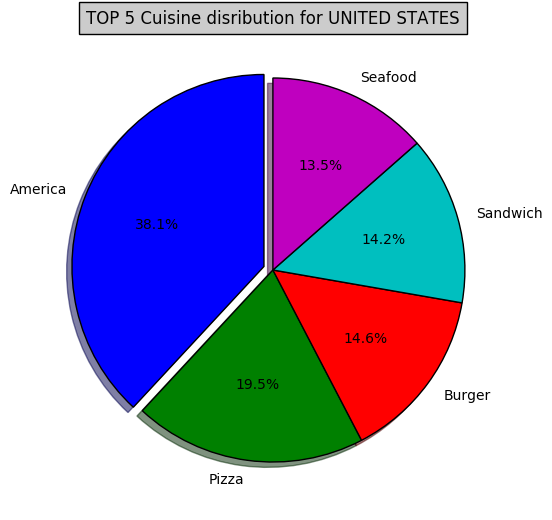

In [64]:
# PLOTTING A PIE CHART FOR UNITED STATED data:

# make a square figure and axes
p = figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'America', 'Pizza', 'Burger', 'Sandwich','Seafood'
fracs = [38.091747,19.548597, 14.620863, 14.222874,13.515920]
explode=(0.05,0,0,0,0)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('TOP 5 Cuisine disribution for UNITED STATES', bbox={'facecolor':'0.8', 'pad':5})
matplotlib.pyplot.show()

In [65]:
p.savefig ( directory+"/analysis/ana_1/ana_1.png" )